# Empalme con la clase anterior




## Propiedades de la transformada de Fourier
### Transformada de Fourier de un "shift" (corrimiento)
Asuma que $g(x) = F(x - s)$, donde $s \in \mathbb{R}$ es un corrimiento
entonces

$$\mathcal{F}[g(x)] = \frac{1}{2 \pi} \int_{-\infty}^{\infty} g(x) \mathrm{e}^{-\mathrm{i} k x} dx = \frac{1}{2 \pi} \int_{-\infty}^{\infty} f(x-s) \mathrm{e}^{-\mathrm{i} k x} dx $$
Hacemos cambio de variable $u=x-s$ entonces $du=dx$, $x=s+u$ o sea

$$\mathcal{F}[f(x-s)] = \mathrm{e}^{-\mathrm{i} s} \frac{1}{2 \pi} \int_{-\infty}^{\infty} f(u) \mathrm{e}^{-\mathrm{i} k u} = \mathrm{e}^{-\mathrm{i} s} \mathcal{F}[f(x)]$$

### Transformada de Fourier del Delta de Dirac
$$\mathcal{F}(\delta(x)) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} \delta(x) \mathrm{e}^{-\mathrm{i} k x} dx = \frac{1}{2 \pi}$$

El siguiente codigo ilustra como la suma de senhales monocromaticas todas con igual fase y amplitud producen un Delta de Dirac (aproximado).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sum_of_cosines_symmetric(n, amplitude=1, time_interval=(-10,10), sampling_rate=1000):

    t=np.linspace(time_interval[0], time_interval[1], int(time_interval[1]-time_interval[0])*sampling_rate, endpoint=False)

    signal = np.zeros_like(t)

    # suma de cosenos
    for k in range(1, n+1):
        signal += amplitude * np.cos(2 * np.pi * k * t/10) # positive
        signal += amplitude * np.cos(2 * np.pi * (-k) * t/10) # negativas

    # plot the resulting signal
    plt.figure(figsize=(10,5))
    plt.plot(t, signal, label=f'Sum of {2*n} cosines')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()



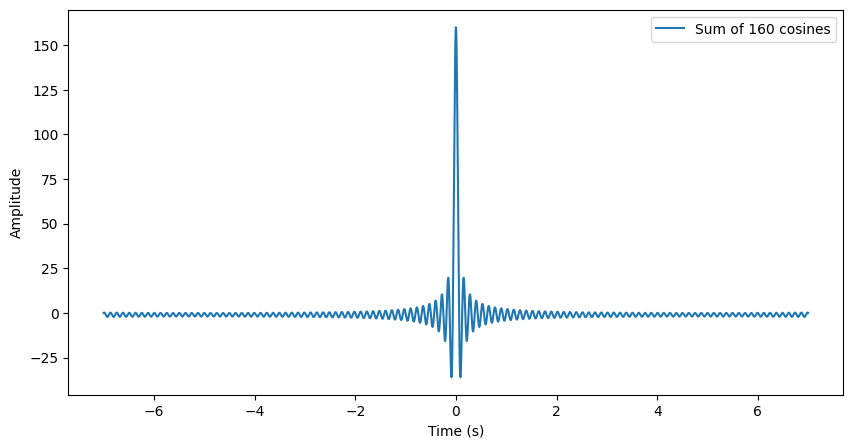

In [ ]:
# prueba
a=7
sum_of_cosines_symmetric(n=80, amplitude=1, time_interval=(-a,a), sampling_rate=2000)

## Trasformada de Fourier de la convolucion
Que es la convolucion?

$$(f * g)(x)= \int_{-\infty}^\infty f(x-y) g(y) dy  $$

### Aplicacones de la convolucion
* Procesamiento de senhales
* Suma de variables aleatorias.

Por definicion de transformada de Fourier

$$\mathcal{F}( f*g(x))) = \frac{1}{2 \pi} \int_{-\infty}^\infty
\left ( \int_{-\infty}^\infty f(x-y) g(y) dy   \right ) \mathrm{e}^{-\mathrm{i} k x}  dx $$
Usamos la regla de Fubini para cambiar el orden de integracion

\begin{eqnarray}
\mathcal{F}( f*g(x)) = \frac{1}{2 \pi} \int_{-\infty}^\infty  g(y)
\left ( \int_{-\infty}^\infty f(x-y) \mathrm{e}^{-\mathrm{i}k x} dx   \right ) dy.
\end{eqnarray}
y usamos sustitucion.

$u=x-y$, $du=dx$, $\mathrm{e}^{-\mathrm{i} k x} = \mathrm{e}^{-\mathrm{i} k (u + y)} $

Entonces queda que

\begin{eqnarray}
\mathcal{F}( f*g(x))) &=&
\frac{1}{2 \pi} \int_{-\infty}^\infty  g(y)
\mathrm{e}^{-\mathrm{i} k y} dy \int_{-\infty}^\infty f(u) \mathrm{e}^{-\mathrm{i} k u} du \\
&=& (2 \pi) \frac{1}{2 \pi} \int_{-\infty}^\infty  g(y)
\mathrm{e}^{-\mathrm{i} k y} dy \frac{1}{2 \pi} \int_{-\infty}^\infty f(u) \mathrm{e}^{-\mathrm{i} k u} du \\
&=& 2 \pi \mathcal{F}(f) \mathcal{F}(g)
\end{eqnarray}
\end{eqnarray}

## Transformada de Fourier de un operador diferencial.
Veremos como la transformada de Fourier convirte una diferencial en un producto.

* Comencemos con $$f_x = \frac{\partial f(x)}{\partial x} $$

$$\mathcal{F} \left [ \frac{\partial f(x)}{\partial x}   \right ]
= \frac{1}{2 \pi} \int_{-\infty}^{\infty}  \frac{\partial f(x)}{\partial x} \mathrm{e}^{-\mathrm{i} k x} dx = \left . \frac{1}{2 \pi} [ f(x) \mathrm{e}^{-\mathrm{i} k x} ] \right |_{-\infty}^\infty  - \int_{-\infty}^{\infty} -\mathrm{i} k f(x) \mathrm{e}^{-\mathrm{i} k x} dx = \mathrm{i} k \mathcal{F}(f(x)) $$

Es decir

$$\mathcal{F}(f'(x)) = \mathrm{i} k \mathcal{F} (f(x)) $$

$$\mathcal{F}(f''(x)) = \mathrm{i} k \mathcal{F} (f'(x))= (\mathrm{i} k) (\mathrm{i} k f(x))= -k^2 \mathcal{F}(f(x)) $$

Y asi sucesivamente encontramos que

$$\mathcal{F}^{(n)}(f(x)) = (\mathrm{i} k)^n \mathcal{F}(f(x)) \tag{1}$$

Que significa la **derivada media**?

$$d^{(1/2)} f(x)/dx^{1/2} $$

Asumamos que en la ecuacion  (1) $n=1/2$
Entonces

$$(\mathrm{i} k^{1/2} \mathcal{F}(f(x)) $$
es la **derivada media**en el dominio $k$. Si queremos saber cual es
la derivada media $d^{1/2} f/dx$, entonces tomamos la transforma inversa de esta. Es decir

 $$\frac{d^{(1/2)}f}{dx^{1/2}}= \mathcal{F}^{-1} ((\mathrm{i} k)^{1/2} \mathcal{F}(f(x)) $$

Para sacar la derivada media de una funcion simplmente

* Tome la transformada de Fourier de la funcion $\mathcal{F}(f(x))$.
* multiplique esta por $\sqrt{\mathrm{i} k}$, es decir
$$\sqrt{\mathrm{i} k } \mathcal{F}( f(x)) $$
* Encuentre la tranformada inversa de lo obtenido en el paso anterior
$$\mathcal{F}^{-1} \left [ \sqrt{\mathrm{i} k } \mathcal{F}( f(x)) \right ] $$

No hay nada especial en $1/2$ puede ser cualquier $q$ racional. En el analisis de arriba cambie $1/2$ por $q$. Que pasa si $q$ es irracional?

## Transformada de Fourier de una constante $A_0$.
Asuma la siguiente senhal

$$A_0 \delta(k) $$
en el dominio del numero de onda (wavenumber)
Hallemos la transformada inversa de esta senhal

$$\mathcal{F}^{-1} ( A_0 \delta(k)) = \int_{-\infty}^{\infty} A_0 \delta(k) \mathrm{e}^{\mathrm{i} k} dk  = A_0 \mathrm{e}^{\mathrm{i} 0} = A_0 $$

Toamos la transformada directa a ambols lados

$$A_0 \delta(k) = \mathcal{F}(A_0) $$
y...listo.

## Transformada de la funcion signo
Sabemos que

$$\frac{d \text{sgn}(x)}{d x} =2 \delta(x) $$

Entonces, de aca.

$$\mathcal{F} \left [ \frac{d \text{sgn}}{dx} \right ] = 2 \frac{1}{2 \pi} = \frac{1}{\pi} $$

Por otro lado

$$\mathcal{F} \left [ \frac{d \text{sgn}}{dx} \right ] = (\mathrm{ik} \mathcal{F}( \text{sgn}(x)) $$
Comparando las dos ecuaciones anteriores

$$\mathcal{F} (\text{sgn}) = \frac{1}{\mathrm{i} \pi k} $$

## Transformada de Fourier de la Heavisde

Tenemos


$$H(x) = \frac{\text{sgn}(x) + 1}{2} = \frac{1}{2 \mathrm{i} k} + \frac{\delta(k)}{2}$$

# Funcion de Green para la ecuacion de Calor.
Queremos resolver, para $t \ge 0$, $x \in \mathbb{R}$

\begin{eqnarray}
\begin{cases}
Lu = u_t - \alpha u_{xx} = F(x,t) \\
u(x,0) = 0  \quad, \quad \text{condicion inicial homogenea} \\
u(\pm \infty,t) = 0  \quad, \quad \text{condiciones de bordo homogeneas} \\
\end{cases}
\end{eqnarray}

La idea detras de las funciones de Green es asumir la solucion del problema similar donde a la derecha la fuente son deltas de Dirac $\delta(x- \xi) \delta(t - \tau)$.

El problema se reduce a:

$$G_t = \alpha G_{xx} + \delta(x-\xi) \delta(t - \tau) $$
Aca $G(x,t ; \xi, \tau)$, para resolver este problema usamos la transformada de Fourier en $x$ , donde

$$\hat{G}(k, t, \xi, \tau) =  \frac{1}{2 \pi} \int_{-\infty}^{\infty} G(x, t, \xi, \tau) \mathrm{e}^{-\mathrm{i} k x} dx$$

Entonces

$$ \hat{G}_t = - \alpha k^2 \hat{G} + \frac{1}{2 \pi} \mathrm{e}^{-\mathrm{i} k \xi} \delta(t - \tau). \tag{2} $$

Esta es una ecuacion ODE (ordinary Differential Equation) con fuente.

Resolvamos primero la homogenea (sin fuente)

$$ \hat{G}_t + \alpha k^2 \hat{G} = 0 $$
La solucion de esta ecuacion es

$$\hat{G}(k, t; \xi, \tau) = C(k, \xi, \tau) \mathrm{e}^{- \alpha k^2(t - \tau)} \tag{3} $$
el argumento $t-\tau$ es por que la "explosion" comienza en $t=\tau$.





Integramos la eucaion (2) en un intervalo pequenho al rededor de $t= \tau$

Tenemos
$$\int_{\tau - \epsilon}^{\tau + \epsilon} \frac{\partial \hat{G}}{\partial t} dt = -\alpha k^2 \int_{\tau - \epsilon}^{\tau + \epsilon} \hat{G} dt + \frac{1}{2 \pi} \mathrm{e}^{-\mathrm{i} k \xi} $$

La segunda integral, al tomoar el limite cuando $\epsilon \to 0$ desaparece, por dos razones
1. Entre $[\tau -\epsilon , 0] $ por causalidad $G=0$, y en otro intervalo $[0, \tau+\epsilon]$ la solucion $G$ esta en la ecuacion (3) que es continua.
Entonces

$$\hat{G}(k , t = \tau^+; \xi) - \hat{G}(k, t=\tau^-; \xi) = \frac{1}{2 \pi} \mathrm{e}^{-\mathrm{i} k \xi} $$

Para $t < \tau$ $G=0$ (por causalida, o que el segundo termino de esta ecuacion es 0. Para $t=\tau$ (en el limite cuando $\epsilon \to 0$

$$\hat{G}(k, t=\tau; \xi) =  \left . \frac{1}{2 \pi} \mathrm{e}^{-\mathrm{i}k \xi} \right |_{t = \tau} $$

De aca y la ecuacion (3) con $t = \tau


$$\hat{G}(k, t; \xi, \tau) = C(k, \xi, \tau) = \frac{1}{2 \pi} \mathrm{e}^{-\mathrm{i} k \xi}  $$

La solucion es:




$$\hat{G}(k, t; \xi, \tau) = \frac{1}{2 \pi}  \mathrm{e}^{-\mathrm{i} k \xi}\mathrm{e}^{- \alpha k^2(t - \tau)} \tag{3} $$

Para regresar a $x$ desde $k$ debemos tomar la tranformada inversa de Fourier.
Es decir

$$G(x, t; \xi, \tau) = \frac{1}{2 \pi} \int_{-\infty}^{\infty}
\mathrm{e}^{\mathrm{i}k(x - \xi)} \mathrm{e}^{-\alpha k^2(t - \tau)} dk $$

Esta integral de tipo Gaussiano esta resuelta en el apendice de las notas de clase.

Es de la forma

$$\int_{-\infty}^{\infty} \mathrm{e}^{\mathrm{i} k b} \mathrm{e}^{-a k^2} dk = \sqrt{\frac{\pi}{a}} \mathrm{e}^{-\frac{b^2}{4a}} $$

Reemplazano $a=\alpha(t-\tau)$, $b=x - \xi$ encontramos que


$$G(x, t; \xi, \tau) = \frac{1}{\sqrt{4 \pi \alpha(t - \tau)}}
\exp \left (  - \frac{(x -\xi)^2}{4 \alpha (t - \tau)} \right )$$

Observe que debido la causalidad, $G=0$ para $t < \tau$.

$$G(x, t; \xi, \tau) =
\frac{1}{\sqrt{4 \pi \alpha(t - \tau)}}
\exp \left (  - \frac{(x -\xi)^2}{4 \alpha (t - \tau)} \right ) H(t - \tau)$$

Como se usa esto?. Recuerden que estamos resolviendo el problema
$Lu = f$, encontramos $L G= \delta()$ Vimos antes que la solucion de
$Lu= f$ es $u=L^{-1} f$ pero esto que quiere decir:

$$u(x) = \langle G, f \rangle  = \int_{-\infty}^\infty \int_{-\infty}^\infty f(x)
\frac{1}{\sqrt{4 \pi \alpha(t - \tau)}}
\exp \left (  - \frac{(x -\xi)^2}{4 \alpha (t - \tau)} \right ) H(t - \tau)
d \xi d \tau$$

## Funcion de Green para la ecuacion de onda unidimensional
Queremos resolver
$$u_{tt} - c^2 u_{xx} = F(x,t) $$
con condiciones iniciales (cero)

$$u(x,0) = 0 \quad , \quad u_t(x,0) = 0 $$
y de frontera

$$u(\pm \infty, t)= 0 $$

La funcion de Green satisface la siguiente ecuacion

$$G_{tt} - c^2 G_{xx} = \delta(x - \xi) \delta(t-\tau) $$
Tomamos la transfoda de Fourier en ambos terminos donde

$$\hat{G}(k, t, \xi, \tau) = \frac{1}{2 \pi} \int_{-\infty}^\infty G(x, t ; \xi, \tau) \mathrm{e}^{-\mathrm{i} k x} dx $$

Para obtener

$$\hat{G}_{tt} +  c^2 K^2 \hat{G} = \frac{1}{2 \pi} \mathrm{e}^{-\mathrm{i} k \xi} \delta(t - \tau)  \tag{4} $$

Resolvememos la homogenea  y despues agregamos la fuente.

1. Solucion de la homogenea
$$\hat{G}_{tt} +  c^2 K^2 \hat{G} =  0 .$$
La resolvermos en terminos de senos y cosenos

$$\hat{G}(k, t, \xi, \tau) = A(k, \xi, \tau) \cos( ck(t - \tau) + B(k, \xi, \tau) \sin (ck(t - \tau). \tag{5} $$

2. Imponenmos condiciones iniciales.
Integramos la ecuacion (4) al rededor de un intervalo pequenho $[\tau-\epsilon, \tau + \epsilon]$

$$\int_{\tau - \epsilon}^{\tau + \epsilon} (\hat{G}_{tt} + c^2 k^2 \hat{G})
dt = \int_{\tau - \epsilon}^{\tau + \epsilon} \frac{1}{2 \pi} \mathrm{e}^{-\mathrm{i k \xi}} \delta(t - \tau) = \frac{1}{2 \pi} \mathrm{e}^{-\mathrm{i} k \xi}$$
=

De la mismo forma que vimos en la ecuacion de calor el segundo termino de la primera integral integra a 0 por ser continuo y por causalidad.
La integral queda


$$\hat{G}_t(k, \tau+) - \hat{G}_t(k, \tau^-) = \frac{1}{2 \pi} \mathrm{e}^{-\mathrm{i} k \xi}$$
Por las condiciones iniciales y causalidad eliminamos el segundo termino por que esta antes de la "explosion". Queda que exactamente en $t=\tau$

$$\hat{G}_t(k, \tau, \xi) = \frac{1}{2 \pi} \mathrm{e}^{-\mathrm{i}k \xi}$$

Aplicamos las condiciones iniciales para hallar $A,B$
